### Submission Instructions

Just fill in the markdown and code cells below with your arguments and functions, and run the Python lines given. Make sure the notebook works fine by executing `Kernel/Restart & Run All`.
  
Once the notebook is ready,
1. Create a folder named `ftdl_last_name1_last_name2` with the team's last names.

2. Put in that folder:

* a file `mp_ftdl_last_name1_last_name2.ipynb` with the cells below completed. Make sure it works by executing Kernel/Restart & Run All.
* a file `mp_ftdl_last_name1_last_name2.html` with an html rendering of the previous .ipynb file (just apply File / Download as HTML after a correct run of Kernel/Restart & Run All).
* a file `mp_ftdl_last_name1_last_name2.pdf` with a pdf print of the html file **without any code**.

3. Compress the folder to a `ftdl_last_name1_last_name2.7z` 7z (or zip) file.

**Very important!!!**

Make sure you follow the file naming conventions above; the miniproject won't be graded until that is so.

## Recommendations in notebook writing

Notebooks are a great tool for data and model exploration. But in that process a lot of Python garbage can get into them as a consequence of the trial and error process.

But once these tasks are done and one arrives to final ideas and insights on the problem under study, the notebook should be **thoroughly cleaned** and the notebook should **concentrate on the insights and conclussions** without, of course, throwing away the good work done.

Below there are a few guidelines about this.

* Put the useful bits of your code as functions on a **Python module** (plus script, if needed) that is imported at the notebook's beginning. 
* Of course that module should be **properly documented** and **formatted** (try to learn about PEP 8 if you are going to write a lot of Python).
* Leave in the notebook **as little code as possible**, ideally one- or two-line cells calling a function, plotting results or so on.
* **Avoid boilerplate code**. If needed, put it in a module.
* Put on the notebook some way to **hide/display the code** (as shown below).
* The displayed information **should be just that, informative**. So forget about large tables, long output cells, dataframe or array displays and so on.
* Emphasize **insights and conclusions**, using as much markdown as needed to clarifiy and explain them.
* Make sure that **number cells consecutively starting at 1.**
* And, of course, make sure that **there are no errors left**. To avoid these last pitfalls, run `Kernel\Restart Kernel and Run All Cells`.

And notice that whoever reads your notebook is likely to toggle off your code and consider just the markdown cells. Because of this, once you feel that your notebook is finished,
* let it rest for one day, 
* then open it up, toggle off the code 
* and read it to check **whether it makes sense to you**.

If this is not the case, **the notebook is NOT finished!!!**

Following these rules you are much more likely to get good grades at school (and possibly also larger bonuses at work).

**IMPORTANT: before turning in your work, please REMOVE FROM IT THE PREVIOUS TWO CELLS**

In [6]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show or hide your raw code."></form>
''')

# The MNIST Problem

The MNIST database (Modified National Institute of Standards and Technology database[1]) is a large database of handwritten digits that is commonly used for training and testing advanced machine learning algorithms. General references are:

**MNIST database**. Wikipedia. https://en.wikipedia.org/wiki/MNIST_database.

**THE MNIST DATABASE of handwritten digits**. Yann LeCun, Courant Institute, NYU Corinna Cortes, Google Labs, New York Christopher J.C. Burges, Microsoft Research, Redmond. http://yann.lecun.com/exdb/mnist/

**Classification datasets results**. Rodrigo Benenson. https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

The MNIST database contains 60,000 training images and 10,000 testing images. In our dataset the images will be 32 x 32 greyscale digit rasters.
In order to manage our computations in reasonable time, we are going to work only with the test subset, which we will further randomly split in a 20% train and validation subset and an 80% test subset.

### Student contributions

* Student `last_name_1` has ...
* Student `last_name_2` has ...

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
from tensorflow import keras 

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

from sklearn.pipeline import Pipeline

## Loading Data

Notice that the shape of each pattern is given by a $32 \times 32 \times 1$ tensor. Thus, you may have to reshape it to either a matrix or a vector depending on the task you want to perform.

In [54]:
f_bnch = "C:/Users/nawir/DeepLearningUAM/mnist_32_32.bnch.joblib"

f_bnch = "C:/Users/nawir/DeepLearningUAM/mnist_32_32.bnch.joblib"
mnist = joblib.load(f_bnch)
print(mnist.keys())

print("data_shape: {0}".format(mnist['data'].shape))
print("data_test_shape: {0}".format(mnist['data_test'].shape))



(train_data,train_target), (test_data, test_target)= keras.datasets.mnist.load_data()


dict_keys(['DESCR', 'target', 'target_test', 'data', 'data_test'])
data_shape: (60000, 1024)
data_test_shape: (10000, 1024)


In [75]:
# Flattern the data into column vector 

train_data_flattern = train_data.reshape(len(train_data),28*28)
test_data_flattern = test_data.reshape(len(test_data),28*28)

In [76]:
train_data.shape, train_target.shape, test_data.shape, test_target.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [77]:
train_data_flattern.shape, test_data_flattern.shape

((60000, 784), (10000, 784))

In [85]:
# print(train_data)
digits = load_digits()
print("data_shape: {0}".format(digits['data'].shape))
print("data_items: {0}".format(digits.keys()))
print("feature_names:\n{0}".format(digits['feature_names']))

df = pd.DataFrame(data=digits['train_data_flattern'], columns=digits['test_data_flattern'])

data_shape: (1797, 64)
data_items: dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
feature_names:
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


KeyError: 'train_data_flattern'

## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms.

### Some examples

Plot 10 randomly chosen digit images as 5 x 2 subplots.

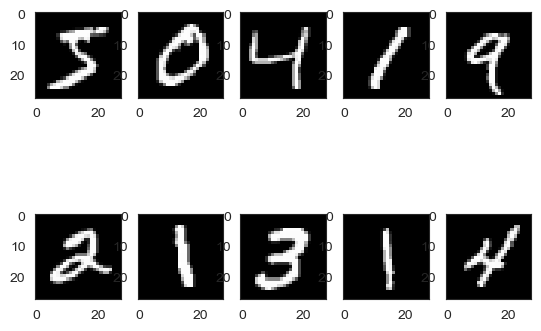

In [79]:
for i in range(10):  
    plt.subplot(2,5 , 1 + i)
    idx =np.random.randint(low=0, high=len(train_data))
#     print(idx)
    plt.imshow(train_data[i], cmap=plt.get_cmap('gray'))
plt.show()

### Descriptive analysis

Build a DataFrame to make easier the exploratory analysis.

In [80]:
#define the DataFrame here

df.describe(include='all').round(decimals=2).T


,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1797.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
pixel_0_1,1797.0,0.30,0.91,0.0,0.0,0.0,0.0,8.0
pixel_0_2,1797.0,5.20,4.75,0.0,1.0,4.0,9.0,16.0
pixel_0_3,1797.0,11.84,4.25,0.0,10.0,13.0,15.0,16.0
pixel_0_4,1797.0,11.85,4.29,0.0,10.0,13.0,15.0,16.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1797.0,12.09,4.37,0.0,11.0,13.0,16.0,16.0
pixel_7_4,1797.0,11.81,4.93,0.0,10.0,14.0,16.0,16.0
pixel_7_5,1797.0,6.76,5.90,0.0,0.0,6.0,12.0,16.0
pixel_7_6,1797.0,2.07,4.09,0.0,0.0,0.0,2.0,16.0


In [31]:
digits['target']

array([0, 1, 2, ..., 8, 9, 8])

Describe the basic statistics of the pixels on the positions in the range `[494 : 502]` of the reshaped patterns.

In [84]:
#perform the description here
print(train_data_flattern(data=df[df.columns[25:41]]))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### Boxplots

Compute and display the boxplots of pixels in the range `[494 : 502]`.

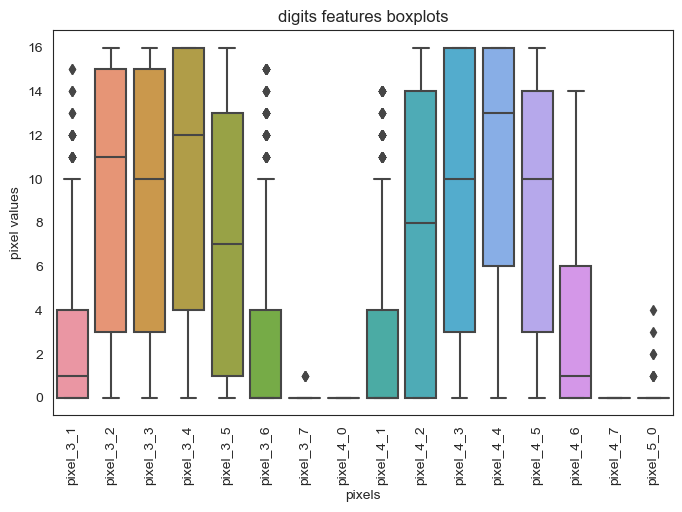

In [81]:
#code the boxplots here
plt.figure( figsize=(8, 5))
plt.title("digits features boxplots")
sns.set_style("white")
bx_plot = sns.boxplot(data=df[df.columns[25:41]])
plt.xticks(rotation=90)
plt.xlabel("pixels")
plt.ylabel("pixel values")
plt.show()

### Histograms and scatterplots

Plot pairplots and histograms over the previous pixel range using `sns.pairplot`.  
To do so select first two target digits (e.g., 2 and 7) and apply `pairplot` only on patterns from those two targets.

In [32]:
#select two target digits and apply sns.pairplot on the indicated pixel range
#we choose some features we expect to be meaningful
l_columns = ['pixel_3_1', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3']
pair_plot = sns.pairplot(df[l_columns + ['target']], hue= 'target', diag_kind="kde", diag_kws=dict(shade=True))
plt.show()

KeyError: "['target'] not in index"

### Correlations

Use the previous pixel range but drop the `target` column.

Use directly a heatmap to display the correlations.

In [ ]:
#display the correlations of the pixel range as a heatmap

### Data Analysis Conclusions

Write down here a summary of your conclusions after the basic data analysis

# Classiffiers

We are going to build a $k$-NN and an MLP classifier **over the test dataset**.  
But before working with any classifier, we split first the test dataset into a train-validation and a test subset.  
Use for this the class `StratifiedShuffleSplit` from scikit-learn. Set the `test_size` parameter to either `0.5` or `0.75`.

### Splitting the test dataset

In [ ]:
#split the test dataset here

## k-NN Classification

### Grid Search of Optimal Number of neighbors

In [ ]:
#define a knn classifier and use CV to estimate the best number of neighbors

### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results

We analyze the CV results to check whether the CV ranges used are correct.

In [ ]:
#plot the test scores that correspond to each number of neighbors

### Test Accuracy and Confusion Matrix

Precision and recall can also be defined for multiclass problems but we will skip them.

In [ ]:
#compute the test predictions, their accuracy and confusion matrix and discuss your results

### Conclusions on the $k$-NN classifier

Discuss your results here

## MLP Classifier

### CV Hyperparametrization

Define an appropriate `MLPClassifier` and perform CV to select proper `alpha` and `hidden_layer_sizes` hyperparameters.

In [ ]:
#define an appropriate MLP classifier and perform CV to select proper alpha and hidden_layer_sizes

### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results

We analyze the CV results to check whether the CV ranges used are correct.

In [ ]:
#plot the test scores that correspond to each alpha; do this only for the best MLP architecture found

### Test MLPC Performance

We check the test accuracy and confusion matrix.

In [ ]:
#compute the test predictions, their accuracy and confusion matrix and discuss your results

### Conclusions on the MLP classifier

Discuss your results here

### Predicting probabilities

We compute class probabilities over the test subset and pairplot them over the 10 classes.

In [ ]:
#compute the test prediction probabilities, and pairplot them here

### Conclusions on the probability pairplots

Discuss the pairplot structure here

### What went wrong?

Probably your classification results are not very impressive.

As a first step to interpret them, find 10 cases of wrongly classified numbers, plot them and discuss your findings.  

In [ ]:
#find these examples and plot the images here

## How to improve your results?

Recapitulate and discuss your results here and propose some ideas on how to improve them